In [5]:
# (0) セットアップ

import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import erf
import matplotlib.pyplot as plt

def error_rate(x, a, b):
    return (1 - erf((x-a) / b * np.sqrt(2))) / 2

def calc_sd(x_data, y_data):
    initial_params = [-5, 1.0]
    params, covariance = curve_fit(error_rate, x_data, y_data, p0=initial_params)

    # フィッティングされた曲線を描画
    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit = error_rate(x_fit, *params)

    plt.scatter(x_data, y_data, label='Data')
    plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')
    plt.legend()

    plt.rcParams['font.family'] = ''
    # plt.title('データ入力時刻とクロック入力時刻の差とDFFのエラー率の関係')
    # plt.xlabel('データ入力時刻 - クロック入力時刻')
    # plt.ylabel('エラー確率')
    plt.xlabel('clock - data (ps)')
    plt.ylabel('Error Rate')

    # x軸の目盛りを整数値にする
    x_ticks = np.arange(int(min(x_data)), int(max(x_data)) + 1, 2)  # ステップサイズを2に設定
    plt.xticks(x_ticks)

    plt.show()
    print("Fitted Parameters:", params)
    return params

    
def calc_sd_hold(x_data,y_data):
    # フィッティングの実行
    params, covariance = curve_fit(error_rate, x_data, y_data)

    # フィッティングされた曲線を描画
    x_fit = np.linspace(min(x_data), max(x_data), 100)
    y_fit = error_rate(x_fit, *params)

    plt.scatter(x_data, y_data, label='Data')
    plt.plot(x_fit, y_fit, label='Fitted Curve', color='red')
    plt.legend()
    plt.xscale('linear')
    plt.yscale('log', base=10)

    plt.rcParams['font.family'] = ''
    #plt.title(title)
    # plt.title('データ入力時刻とクロック入力時刻の差とDFFのエラー率の関係')
    # plt.xlabel('データ入力時刻 - クロック入力時刻')
    # plt.ylabel('エラー率')
    plt.xlabel('data - clock (ps)')
    plt.ylabel('Error Rate')

    # x軸の目盛りを整数値にする
    x_ticks = np.arange(int(min(x_data)), int(max(x_data)) + 1, 2)  # ステップサイズを2に設定
    plt.xticks(x_ticks)
    
    plt.show()
    print("Fitted Parameters:", params)
    return params

    
def curve_point_search(x_data,y_data):
    data_index = 0
    for i,data  in enumerate(x_data):
        if i < len(x_data):
            if 0 < float(data) and 1.0 > float(data) and 0 < float(x_data[i]) and 1.0 > float(x_data[i]):
                data_index = i
                break
    return x_data[data_index:data_index+30]

findfont: Font family [] not found. Falling back to DejaVu Sans.


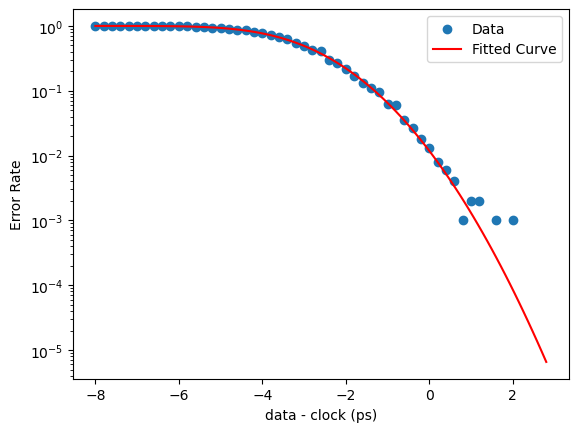

Fitted Parameters: [-3.02635974  2.67371428]


In [6]:
# (1) ホールドタイムの計算

# パラメータの指定
lic = 192.5
ic = 50

# ファイル名の指定
file = "timing/hold_"+ str(lic) + "_" +str(ic)+".csv"
# log_file = "time_param.csv"

df = pd.read_csv(file,names=["time","error_count","clock1_rate","clock2_rate","clock3_rate"])
x_data = df["time"]-300
y_data = 1-df["clock2_rate"]

# カーブフィッティング
params = calc_sd_hold(x_data,y_data)

#　ファイルに書き込み
#pd.DataFrame([{'lic':lic,'ic':ic,'mean':round(params[0],3),'std':round(params[1],3)}]).to_csv(log_file,mode="a",header=False,index=False)



findfont: Font family [] not found. Falling back to DejaVu Sans.


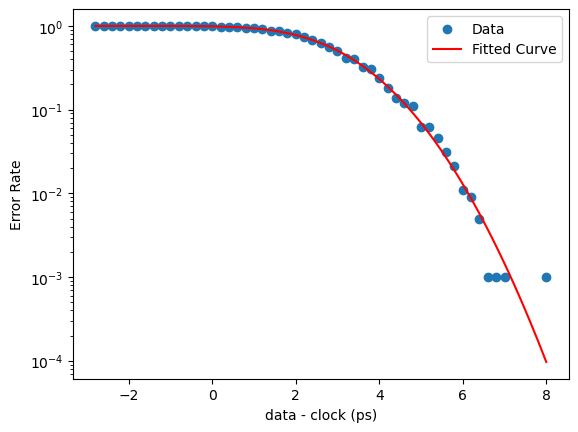

Fitted Parameters: [3.02267767 2.67063181]


In [3]:
# (2) セットアップタイムの計算

# パラメータの指定
lic = 192.5
ic = 50

# ファイル名の指定
file = "timing/setup_"+ str(lic) + "_" +str(ic)+".csv"
# log_file = "timing/setup_time.csv"

df = pd.read_csv(file,names=["time","error_count","clock1_rate","clock2_rate","clock3_rate"])
x_data = 400-df["time"]
y_data = 1-df["clock2_rate"]

# カーブフィッティング
params = calc_sd_hold(x_data,y_data)
#　ファイルに書き込み
#pd.DataFrame([{'lic':lic,'ic':ic,'mean':round(params[0],3),'std':round(params[1],3)}]).to_csv(log_file,mode="a",header=False,index=False)



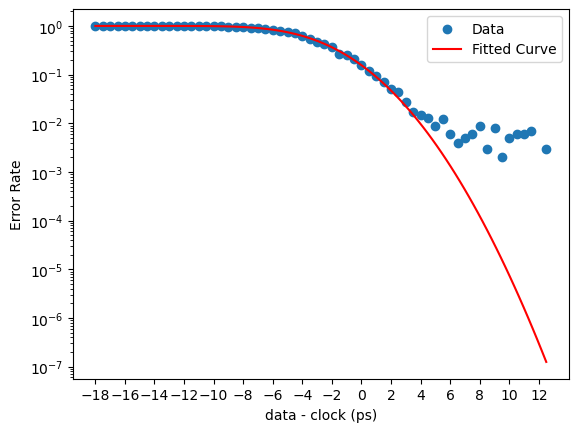

Fitted Parameters: [-3.04825872  6.02975048]


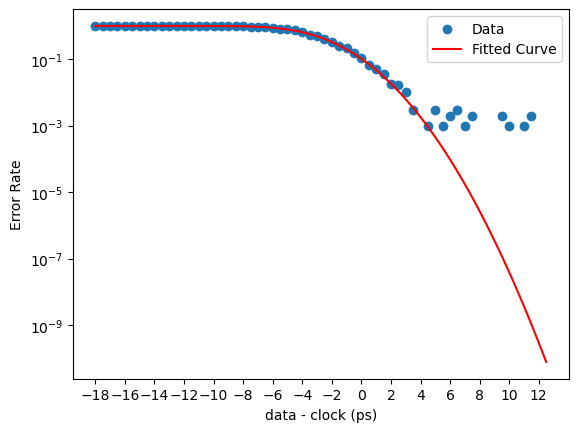

Fitted Parameters: [-3.0886695   4.87198019]


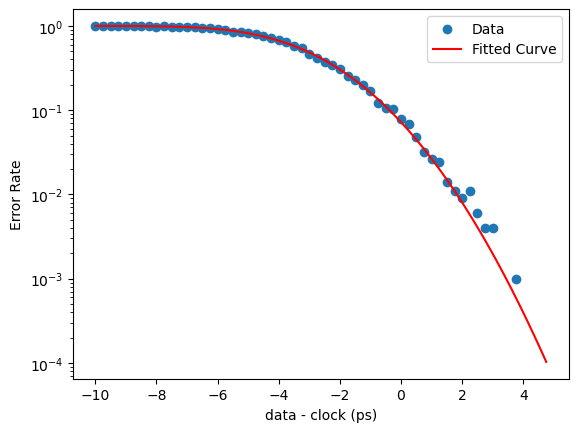

Fitted Parameters: [-3.08268978  4.22037585]


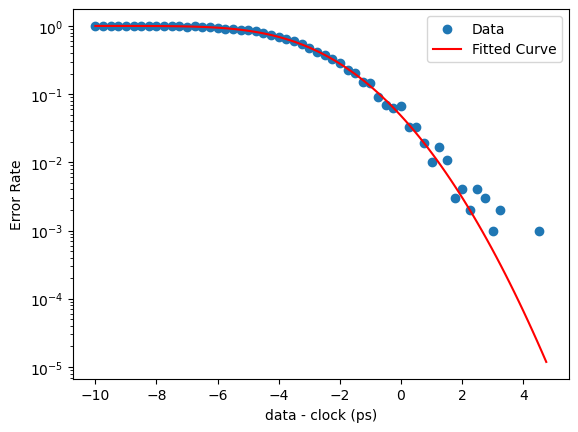

Fitted Parameters: [-3.08465025  3.70740385]


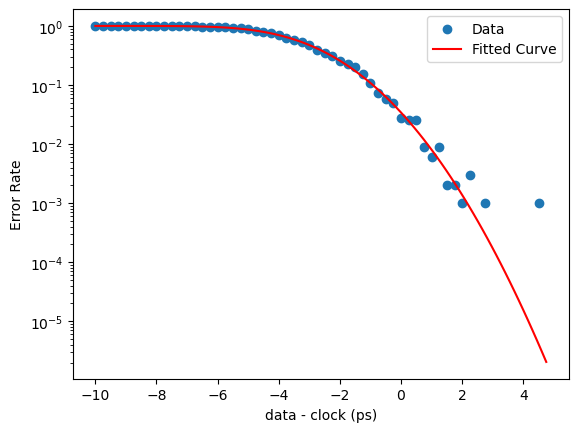

Fitted Parameters: [-3.11047687  3.41280235]


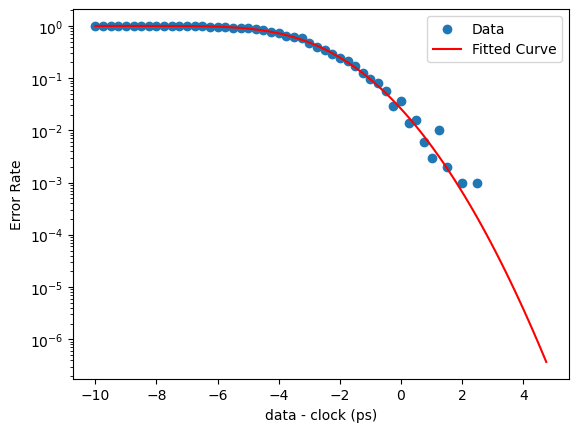

Fitted Parameters: [-3.07543769  3.16088787]


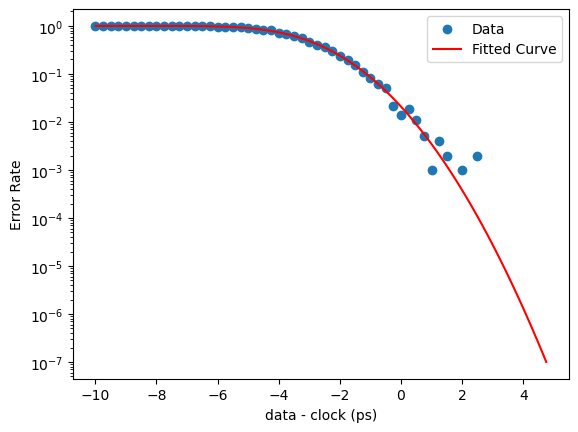

Fitted Parameters: [-3.06023197  3.00470338]


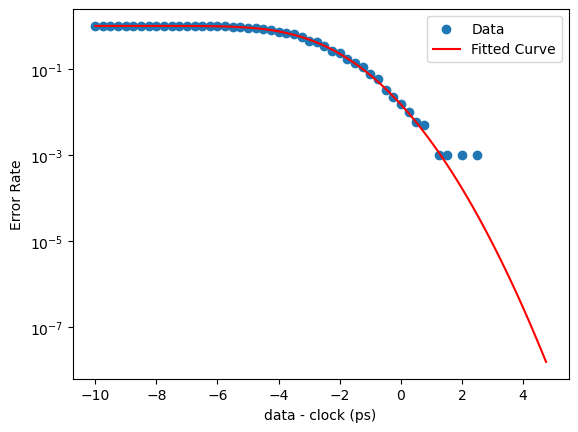

Fitted Parameters: [-3.06458283  2.82310936]


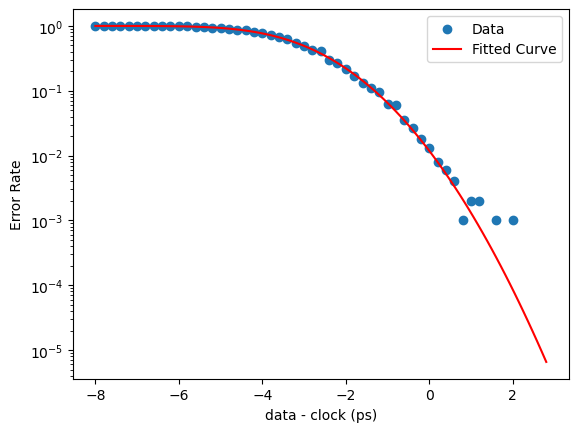

Fitted Parameters: [-3.02635974  2.67371428]


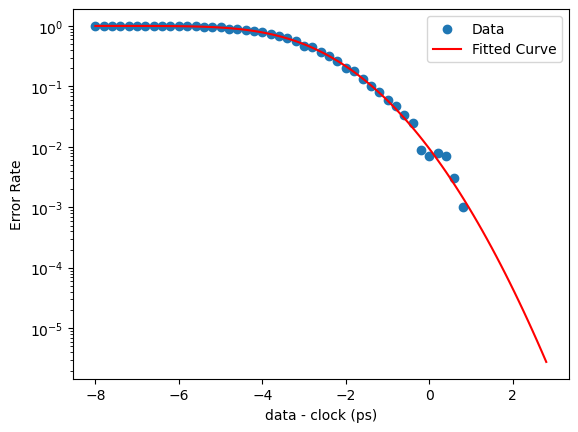

Fitted Parameters: [-3.00847238  2.55709742]


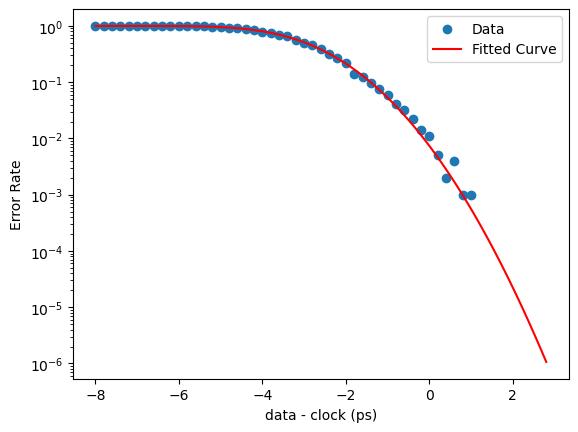

Fitted Parameters: [-2.96593828  2.43253321]


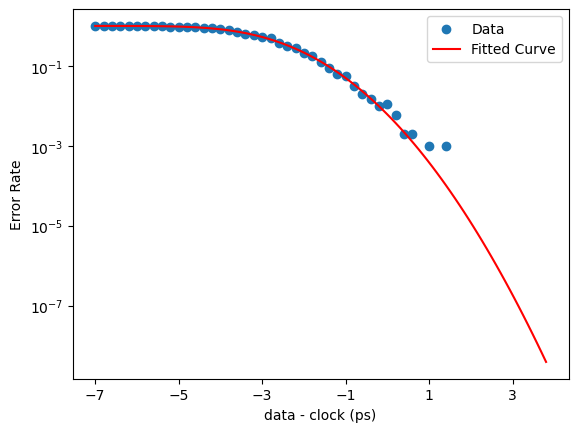

Fitted Parameters: [-2.91886293  2.32814723]


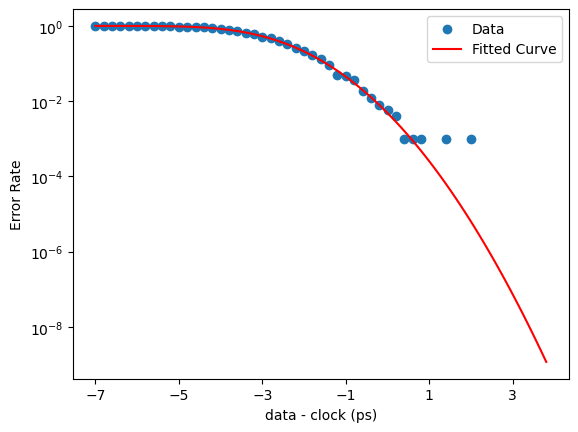

Fitted Parameters: [-2.90972538  2.24758926]


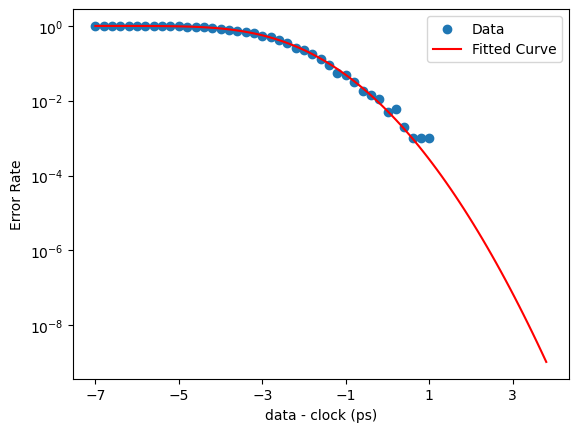

Fitted Parameters: [-2.83190089  2.21431846]


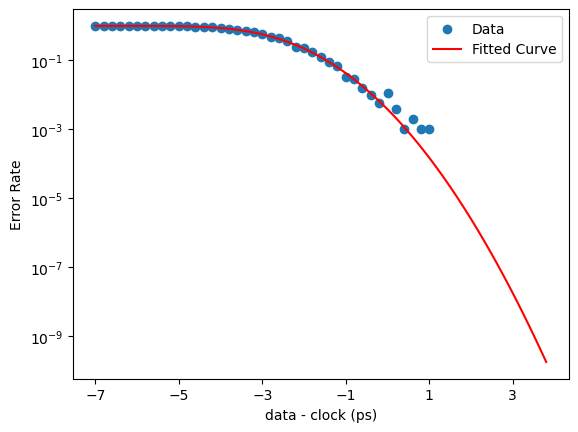

Fitted Parameters: [-2.81447539  2.10997847]


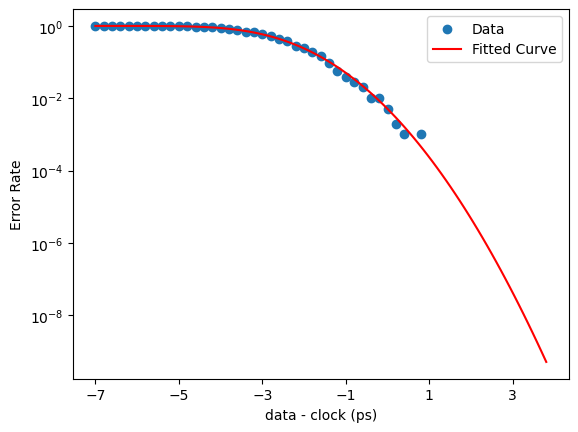

Fitted Parameters: [-2.76585882  2.15129721]


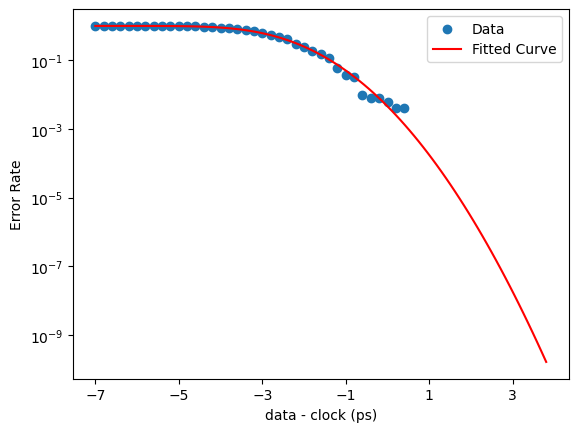

Fitted Parameters: [-2.69840475  2.06806183]


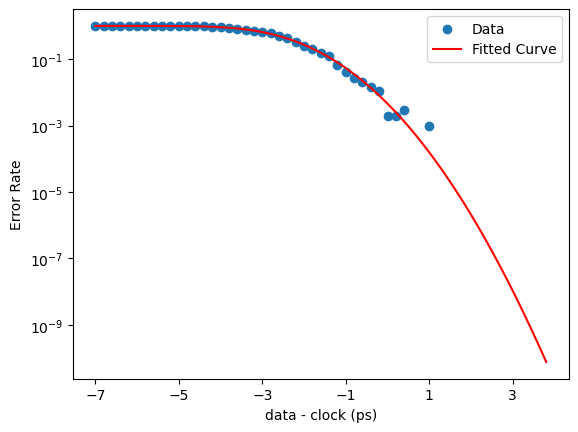

Fitted Parameters: [-2.61129627  2.00277528]


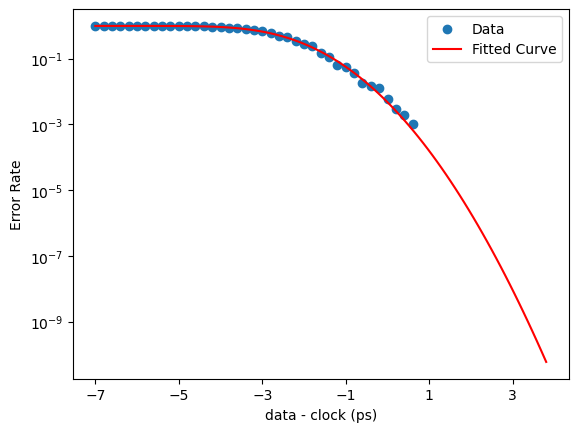

Fitted Parameters: [-2.5620573   1.97557286]


In [7]:
# (3))複数の臨界電流値での算出
log_file = "timing/hold_time.csv"
lic = 192.5

for ic in range(10,105,5):
    file = "timing/hold_"+str(lic)+"_"+str(ic)+".csv"
    df = pd.read_csv(file,names=["time","error_count","clock1_rate","clock2_rate","clock3_rate"])
    x_data = df["time"]-300
    y_data = 1-df["clock2_rate"]
    params = calc_sd_hold(x_data,y_data)
    pd.DataFrame([{'lic':lic,'ic':ic,'mean':round(params[0],3),'std':round(params[1],3)}]).to_csv(log_file,mode="a",header=False,index=False)



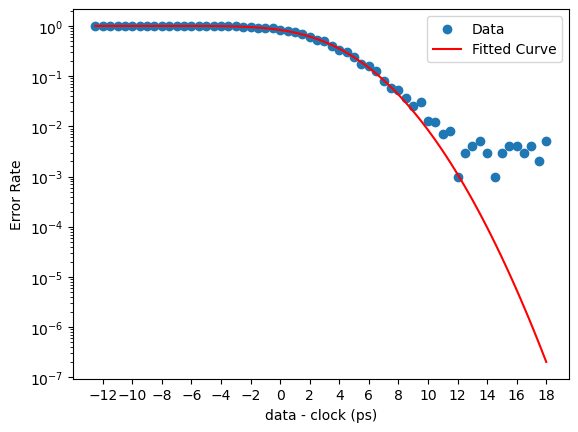

Fitted Parameters: [2.86279167 5.97552076]


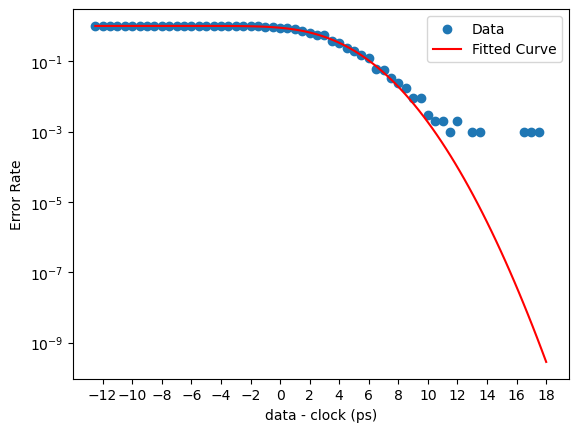

Fitted Parameters: [2.94307076 4.85861954]


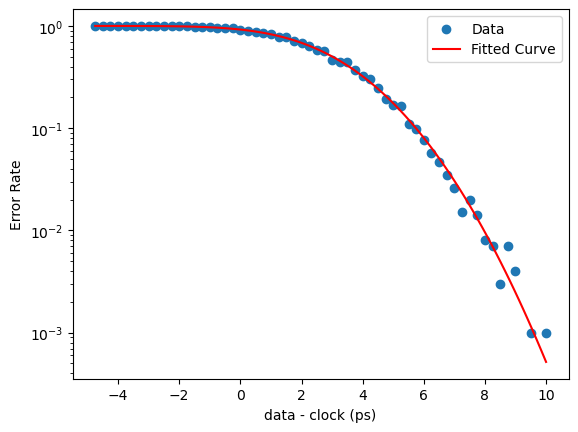

Fitted Parameters: [3.01426063 4.25867877]


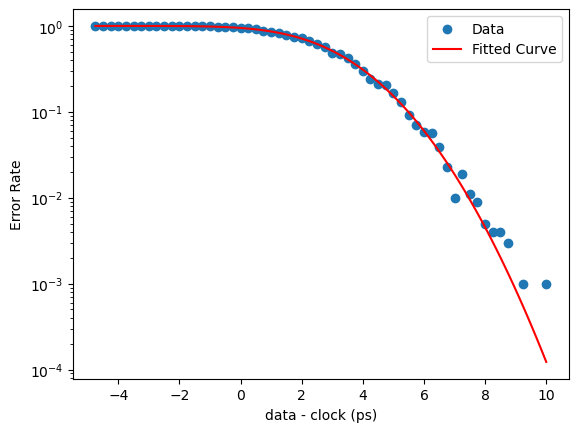

Fitted Parameters: [3.06028539 3.78468307]


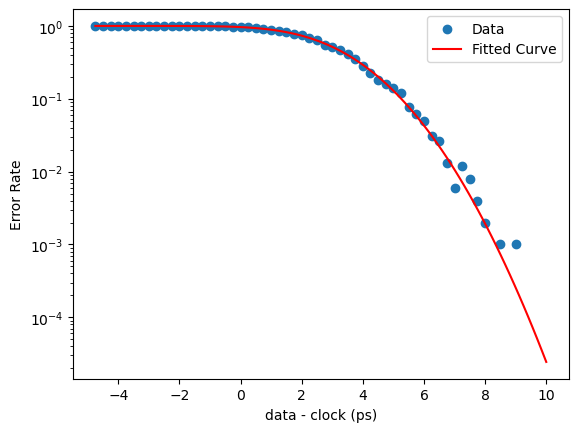

Fitted Parameters: [3.06842008 3.41339843]


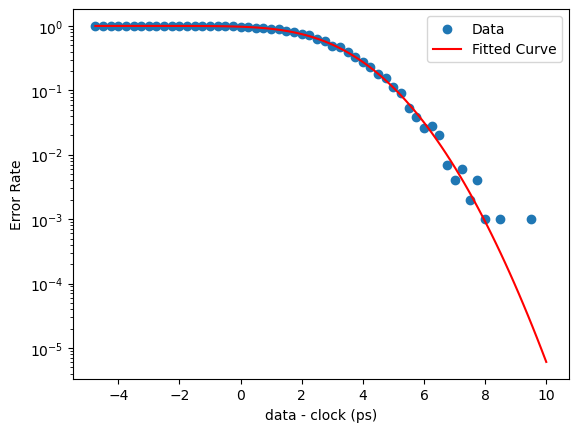

Fitted Parameters: [3.05267316 3.17565213]


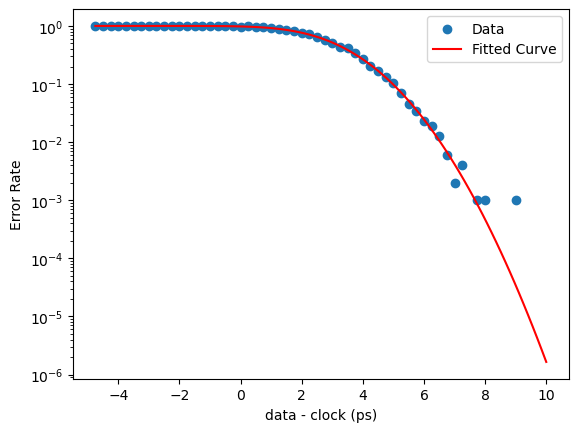

Fitted Parameters: [3.06847819 2.98069825]


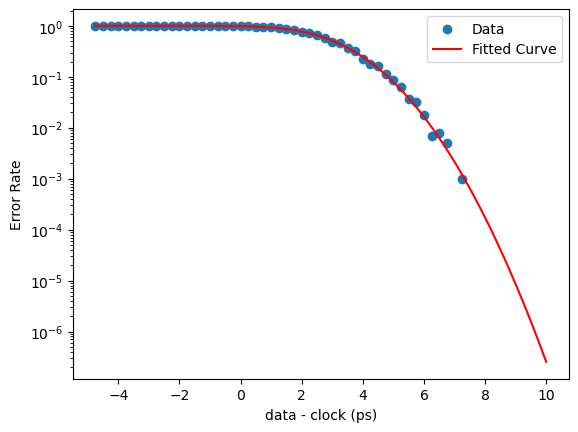

Fitted Parameters: [3.0464603  2.76815685]


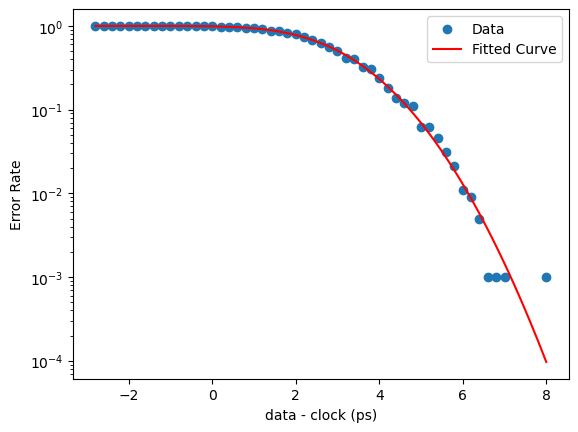

Fitted Parameters: [3.02267767 2.67063181]


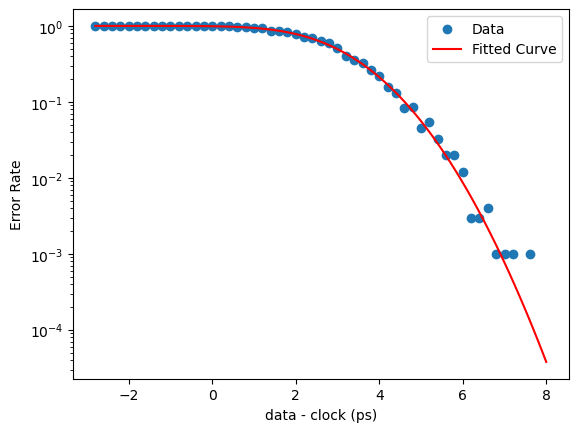

Fitted Parameters: [2.98499728 2.53414473]


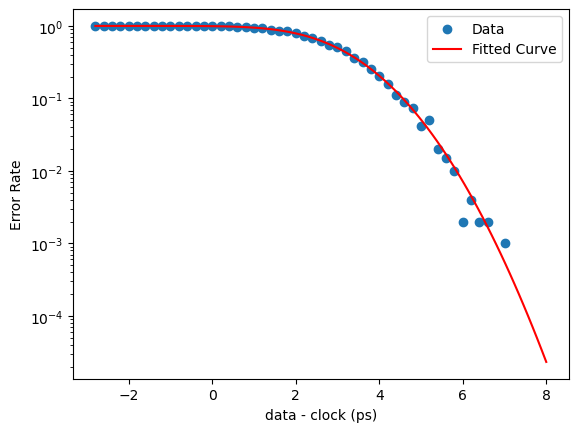

Fitted Parameters: [2.98707898 2.46109023]


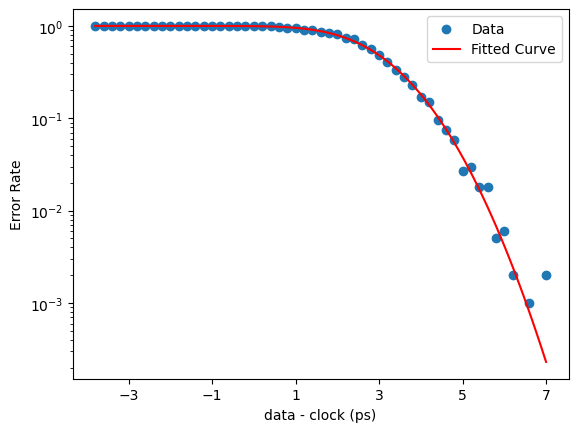

Fitted Parameters: [2.94690839 2.31456096]


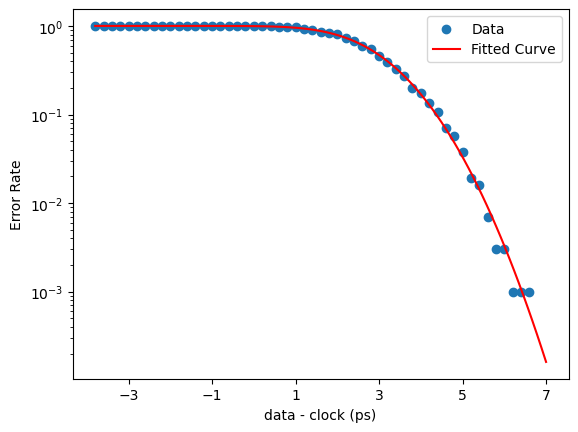

Fitted Parameters: [2.91276052 2.27319211]


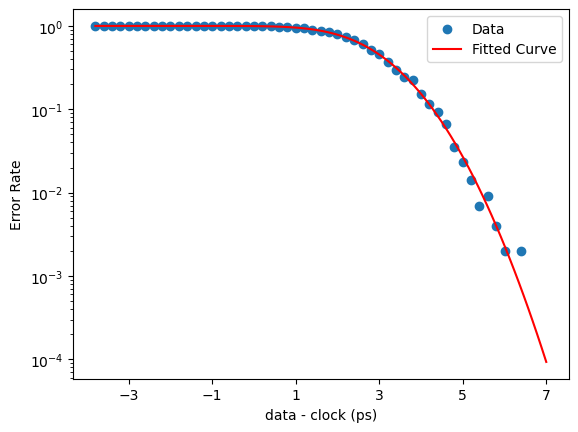

Fitted Parameters: [2.8697911  2.21017964]


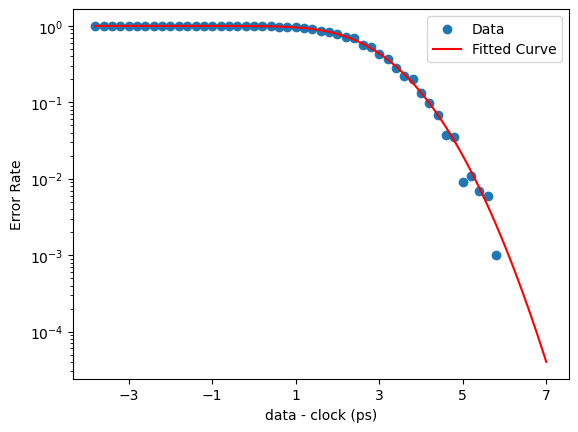

Fitted Parameters: [2.8307164  2.11401369]


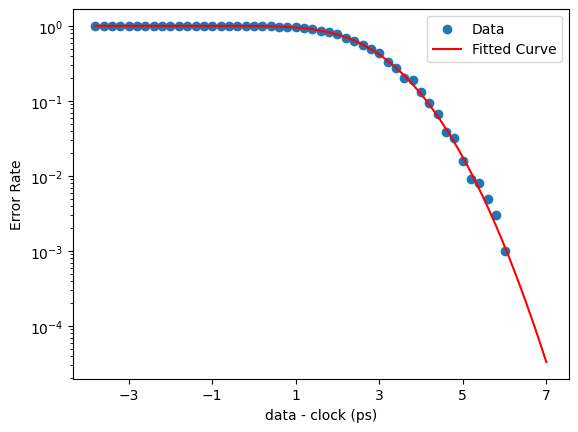

Fitted Parameters: [2.77373828 2.11924039]


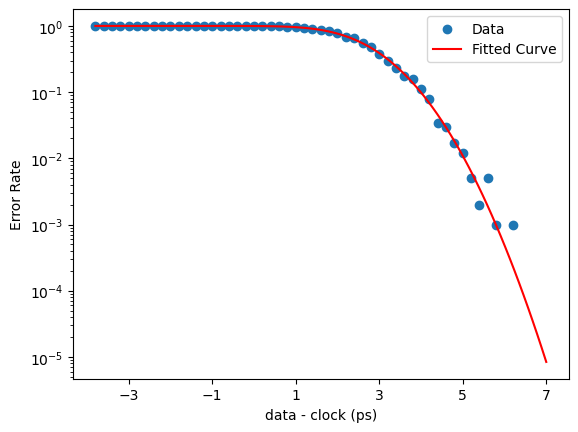

Fitted Parameters: [2.71866066 1.98979717]


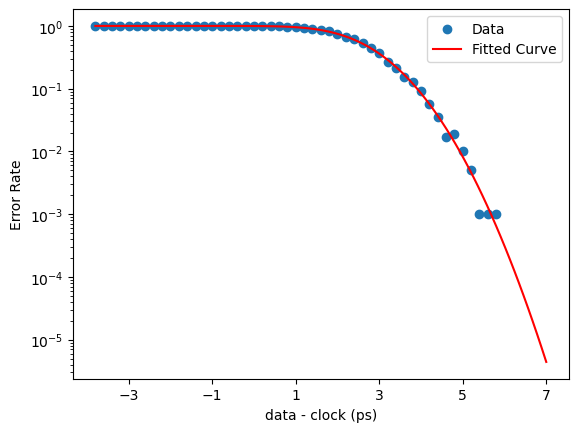

Fitted Parameters: [2.65358656 1.95621357]


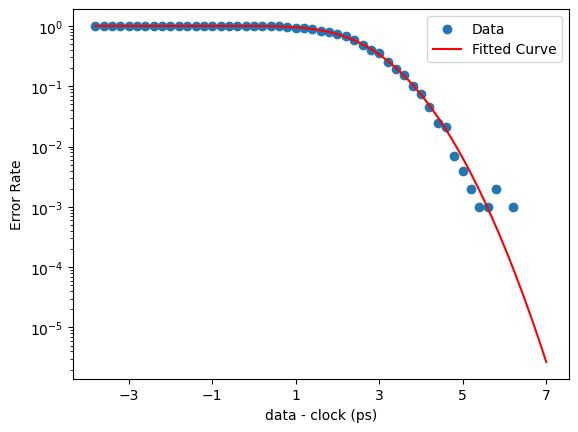

Fitted Parameters: [2.58736878 1.93975118]


In [6]:
log_file = "timing/setup_time.csv"
lic = 192.5

for ic in range(10,105,5):
    file = "timing/setup_"+str(lic)+"_"+str(ic)+".csv"
    df = pd.read_csv(file,names=["time","error_count","clock1_rate","clock2_rate","clock3_rate"])
    x_data = 400-df["time"]
    y_data = 1-df["clock2_rate"]
    params = calc_sd_hold(x_data,y_data)
    pd.DataFrame([{'lic':lic,'ic':ic,'mean':round(params[0],3),'std':round(params[1],3)}]).to_csv(log_file,mode="a",header=False,index=False)

